In [20]:
from tensorflow import keras

model = keras.models.load_model('asl_model.h5')

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,051 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 2 (12.00 B)

In [22]:
image_path=r'C:\Users\allen\Downloads\asl_alphabet_test\asl_alphabet_test\A_test.jpg'

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

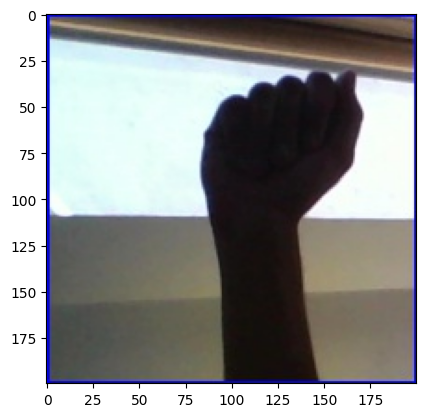

In [24]:
show_image(image_path)

In [25]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

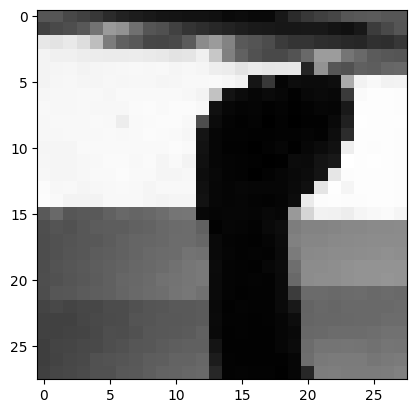

In [26]:
image = load_and_scale_image(image_path)
plt.imshow(image, cmap='gray')

In [27]:
image = image_utils.img_to_array(image)

In [28]:
image = image.reshape(1,28,28,1) 

In [29]:
image = image / 255

In [30]:
prediction = model.predict(image)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
[[8.34274789e-33 1.54535078e-25 1.58298019e-04 1.42652341e-27
  5.69713336e-21 6.13372841e-24 9.99838591e-01 2.46358741e-06
  1.03870656e-26 1.04644467e-21 7.87569092e-22 1.75974986e-25
  5.65210128e-31 8.17979240e-10 5.54145061e-07 2.05997108e-10
  5.66165906e-24 1.53489439e-23 5.05545050e-15 4.88271582e-27
  1.97658955e-37 8.85180967e-36 1.85819110e-10 3.73660944e-23]]


In [31]:
import numpy as np
++np.argmax(prediction)

6

In [32]:
alphabet = "ABCDEFGHIKLMNOPQRSTUVWXY"

In [33]:
alphabet[np.argmax(prediction)+1]

'H'

In [34]:
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1) 
    image = image/255
    prediction = model.predict(image)
    # convert prediction to letter
    predicted_letter = alphabet[np.argmax(prediction)+1]
    if(image_path[-10].islower()):
        s=" "
    else:
        s=image_path[-10]
    return s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MY NAME IS ALLEN


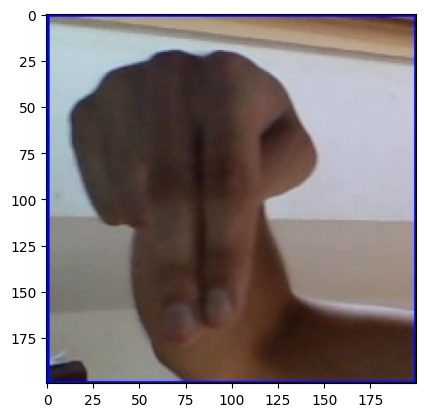

In [35]:
import os

folder_path = r'C:\Users\allen\Downloads\asl_alphabet_test\Intro'
word = ""
image_files = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png'))]
image_files.sort(key=lambda x: int(''.join(filter(str.isdigit, os.path.splitext(x)[0]))))

for file in image_files:
    image_path = os.path.join(folder_path, file)
    word += predict_letter(image_path)
    #print(image_path)  

print(word)


In [36]:

#text to speech
from gtts import gTTS
import os
language = 'en'
myobj = gTTS(text=word, lang=language, slow=True)
myobj.save("text_to_speech.mp3")
os.system("start text_to_speech.mp3")


0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


'N'

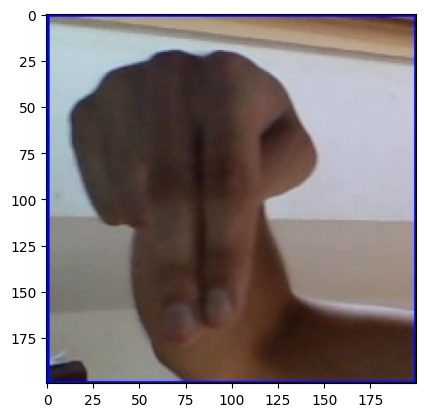

In [37]:
predict_letter(image_path)

In [38]:
def reverse():
    word=input()
    folder_path = r'C:\Users\allen\Downloads\asl_alphabet_test\asl_alphabet_test'

    image_files = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png'))]
    for i in word:
        for file in image_files:
            image_path = os.path.join(folder_path, file)
        #image = Image.open(image_path)
        #print(predict_letter(image_path))
            if(image_path[-10]==i):
                show_image(image_path)


In [39]:
reverse()

In [40]:
'''
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)
'''

'\nimport IPython\napp = IPython.Application.instance()\napp.kernel.do_shutdown(True)\n'

<center><a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a></center>